<a href="https://colab.research.google.com/github/patriani/MPEG-7_lite-Svm/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
from skimage import data, color, util, io, transform
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, svm
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import scipy.stats as stats

np.random.seed(393) # seed de aleatoriedade prédefinida para replicar os resultados obtidos

Para conhecer as características das imagens de cada classe e definir as caracerísticas a serem extraídas alguns testes foram feitos por meio da média e do desvio padrão. 

As propriedades extraídas estão listadas na documentação de skimage.measure.regionprops() e foram analisadas por meio do df.describe(), método da biblioteca pandas . O intuito deste passo é a decisão de quais características podem diferenciar classes das imagens com maior eficiência. Nota-se também que as classes disponíveis se apresentam em: maçã (*apple*), osso (*bone*), besouro (*beetle*) e morcego (*bat*).

> Classes:
0.   apple;
1.   bat;
2.   beetle;
3.   bone.

Próximos Passos:

0.   Analisar o contexto para decidir quais características serão consideradas pelo algoritmo;
1.   Organizar os conjuntos de Treino e Teste em DataFrames, da biblioteca pandas;
2.   Normalizar os parâmetros (Z-score);
3.   Aplicar o SVM em ciclos para otimização dos parâmetros;
3.   Validar o modelo;
4.   Imprimir matriz de Confusão para treino (504 imagens) e de teste (216 imagens).
5. Analisar os resultados.

OBS: Foi definido o argumento random_state=393 para replicação dos resultados


In [ ]:
## Análise de características da classe maçã

directory = 'drive/MyDrive/Visão/Train/apple'
apple = pd.DataFrame(0,index=range(0,126),columns=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory):
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      apple.iloc[index] = df1.iloc[0]
      index+=1

# apple = apple.drop(columns=['Labels']).copy
labels = pd.DataFrame(0,index=range(0,126),columns=['Labels']) 
labels.Labels = int(0)
apple['Labels'] = labels #cria uma coluna de labels com 0 para todas as maçãs

print(apple)
print(apple.describe()) ## solidity é o que melhor descreve a maçã

     major_axis_length  minor_axis_length  euler_number  eccentricity  \
0            95.191371          49.793967            -1      0.852275   
1           178.893989         143.120961             1      0.599957   
2           148.953985          90.010876             1      0.796767   
3           112.621111          64.170198            -1      0.821791   
4           107.227200          90.270861             1      0.539688   
..                 ...                ...           ...           ...   
121         184.653420         130.951270             0      0.705034   
122         117.650008          86.718927             1      0.675792   
123         128.866456          93.359927            -2      0.689306   
124         199.064889         188.622634             1      0.319627   
125         158.806728         127.079014            -2      0.599718   

       extent  solidity  Labels  
0    0.543325  0.920861       0  
1    0.693559  0.937591       0  
2    0.657456  0.9679

Decidimos observando a média e desvio padrão que as celuas são as melhores, euler_number, eccentricity, Extent, Solidity, labels

In [ ]:
## Análise de características da classe morcego

directory = 'drive/MyDrive/Visão/Train/bat'
bat = pd.DataFrame(0,index=range(0,126),columns=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      bat.iloc[index] = df1.iloc[0]
      index+=1

      
labels = pd.DataFrame(0,index=range(0,126),columns=['Labels']) 
labels.Labels = 1
bat['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

print(bat)
print(bat.describe()) ## solidity é o que melhor descreve a maçã

     major_axis_length  minor_axis_length  euler_number  eccentricity  \
0           197.340256         123.876253             1      0.778432   
1           256.870111         122.207489             0      0.879577   
2           458.056611         174.539299             1      0.924557   
3           449.553924         135.428975            -1      0.953545   
4           247.610496          74.369686             1      0.953829   
..                 ...                ...           ...           ...   
121         380.014816         146.175092             0      0.923060   
122         463.157977         221.446023             0      0.878293   
123         275.114716         156.807603             1      0.821664   
124         385.065557         147.840874             1      0.923359   
125         329.578536         170.612656             1      0.855581   

       extent  solidity  Labels  
0    0.434965  0.705202       1  
1    0.343841  0.683608       1  
2    0.429378  0.7105

In [ ]:
## Análise de características da classe besouro

directory = 'drive/MyDrive/Visão/Train/beetle'
beetle = pd.DataFrame(0,index=range(0,126),columns=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      beetle.iloc[index] = df1.iloc[0]
      index+=1

labels = pd.DataFrame(0,index=range(0,126),columns=['Labels']) 
labels.Labels = 2
beetle['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

print(beetle)
print(beetle.describe()) ## solidity é o que melhor descreve a maçã

     major_axis_length  minor_axis_length  euler_number  eccentricity  \
0           167.574165          67.719023            -3      0.914709   
1           169.900566          60.551611            -8      0.934336   
2           165.063319          54.983081            -3      0.942890   
3           127.375250          75.958653           -30      0.802734   
4           131.396231          44.648139           -13      0.940499   
..                 ...                ...           ...           ...   
121         205.417879         118.922381           -30      0.815378   
122         203.760482         156.929875            -9      0.637841   
123         132.332693          46.711609            -7      0.935629   
124         156.957187          64.801941            -7      0.910793   
125         135.100057         127.972835           -16      0.320511   

       extent  solidity  Labels  
0    0.273130  0.450409       2  
1    0.198294  0.373791       2  
2    0.341031  0.4288

In [ ]:
## Análise de características da classe osso

directory = 'drive/MyDrive/Visão/Train/bone'
bone = pd.DataFrame(0,index=range(0,126),columns=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['major_axis_length','minor_axis_length','euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      bone.iloc[index] = df1.iloc[0]
      index+=1

labels = pd.DataFrame(0,index=range(0,126),columns=['Labels']) 
labels.Labels = 3
bone['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

print(bone)
print(bone.describe()) ## solidity é o que melhor descreve a maçã

     major_axis_length  minor_axis_length  euler_number  eccentricity  \
0           603.453560         119.698667             1      0.980130   
1           340.874400          31.762009             1      0.995649   
2           345.200223          60.815311             1      0.984359   
3           626.831738          64.203646             1      0.994741   
4           283.137444          48.001326             1      0.985524   
..                 ...                ...           ...           ...   
121         399.827838          93.252053             1      0.972421   
122         308.106393          73.535051             1      0.971101   
123         403.668456          87.389657             1      0.976285   
124         295.906537          69.044926             1      0.972397   
125         315.271110          69.943481             1      0.975080   

       extent  solidity  Labels  
0    0.235211  0.595602       3  
1    0.139221  0.465298       3  
2    0.362302  0.4694

Nó código imediatamente abaixo observa-se o passo de validação aplicado por meio do K-fold em: sklearn.model_selection.GridSearchCV (nos quadros que retornam matriz de confusão)

In [ ]:
##SPLIT do conjunto de treino para validação e normalização de ambos

frames = [apple,bat,beetle,bone]
df_train = pd.concat(frames) #faz a união dos dataframes

df_train = (df_train.drop(columns=['major_axis_length','minor_axis_length'])).copy() #eliminando características que demonstraram não serem úteis para classificação

y_train = df_train.Labels #monta coluna de classificadores
X_train = df_train.drop(columns=['Labels']) #monta conjunto de dados sem os classificadores

#normalização utilizando z_score (baseado na média e desvio padrão)
X_train_norm = stats.zscore(X_train) 

Abaixo é apresentado o código para organização do conjunto de teste em um DataFrame de dados e um vetor de rótulos.

In [ ]:
##apple
directory = 'drive/MyDrive/Visão/mpeg7_4classes_aug_x8_work/Test/apple'
apple = pd.DataFrame(0,index=range(0,54),columns=['euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      apple.iloc[index] = df1.iloc[0]
      index+=1

labels = pd.DataFrame(0,index=range(0,54),columns=['Labels']) 
labels.Labels = 0
apple['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

## bat
directory = 'drive/MyDrive/Visão/mpeg7_4classes_aug_x8_work/Test/bat'
bat = pd.DataFrame(0,index=range(0,54),columns=['euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      bat.iloc[index] = df1.iloc[0]
      index+=1

labels = pd.DataFrame(0,index=range(0,54),columns=['Labels']) 
labels.Labels = 1
bat['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

##beetle
directory = 'drive/MyDrive/Visão/mpeg7_4classes_aug_x8_work/Test/beetle'
beetle = pd.DataFrame(0,index=range(0,54),columns=['euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      beetle.iloc[index] = df1.iloc[0]
      index+=1

labels = pd.DataFrame(0,index=range(0,54),columns=['Labels']) 
labels.Labels = 2
beetle['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

##bone
directory = 'drive/MyDrive/Visão/mpeg7_4classes_aug_x8_work/Test/bone'
bone = pd.DataFrame(0,index=range(0,54),columns=['euler_number','eccentricity','extent','solidity'])
index=0
for filename in os.scandir(directory): 
    if filename.is_file(): 
      img = io.imread(filename.path)
      label_img = label(img)
      props = regionprops_table(label_img, properties=['euler_number','eccentricity','extent','solidity'])
      df1=pd.DataFrame(props)
      bone.iloc[index] = df1.iloc[0]
      index+=1

labels = pd.DataFrame(0,index=range(0,54),columns=['Labels']) 
labels.Labels = 3
bone['Labels'] = labels #cria uma coluna de labels com 1 para todos os morcegos

##unindo os dataframes em um só de teste
frames = [apple,bat,beetle,bone]
df_test = pd.concat(frames) #faz a união dos dataframes

##separando dados dos rótulos
y_test = df_test.Labels #monta coluna de classificadores
df_test_data = (df_test.drop(columns=['Labels'])).copy() #monta conjunto de dados sem os classificadores

##normalizando os dados de teste
X_test_norm = stats.zscore(df_test_data) 


Kernels do SVM são funções que sistematizam a classificação de objetos, preferencialmente em mais de duas dimensões. Abaixo estão citadas alguns dos kernels do método SVM e que foram utilizados nesta prática:

1.  **Kernel Polinomial** ({‘poly’}): utilizado para classes não linearmente separáveis. Parâmetros de otimização = gamma(inclinação do plano),c(constante) e d é o grau polinomial;
2.  **Kernel Gaussiano** (Radial Basis Function - {'rbf'}): é muito sensível a ruidos e seu parâmetro de espalhamento é muito sensível. Caso seja superestimado o Kernel perde a vantagem da análise não linear;
3.   **Kernel Sigmoidal** ({‘sigmoid’}): y atua como escala dos dados e c como parâmetro de deslocamento do hiperplano de separação;
4.   **Kernel Linear** ({‘linear’}): para efeito de comparação foi utilizada uma função de separação linear.


os melhores parametros são {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Métricas da Matriz de Confusão de Teste do Kernel Gaussiano(54 elementos de cada classe):
                      0         1         2         3
acuracia       0.981481  0.981481  0.981481  0.981481
precisao            1.0       1.0  0.964286  0.964286
sensitividade       1.0  0.925926       1.0       1.0
f1_score            1.0  0.961538  0.981818  0.981818


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


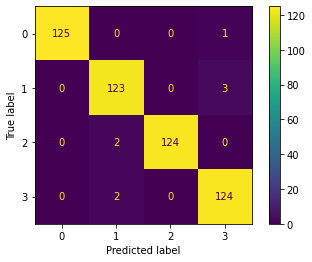

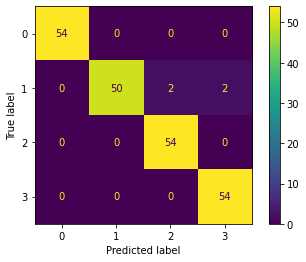

In [ ]:
##Aplicação do Kernel Gaussiano

# Definição dos parâmetros de teste necessários
param_grid = [
    {'C':[0.5,1,3,5,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']}
]
# CV = número de folds para validação (K-Fold), Verbose=0 faz retornar apenas a saída da melhor seleção de parametros
# Scoring=mediade de ranking das melhores combinações de parâmetros, param_grid=forma de leitura dos parâmetros sendo dicionário
# SVC=SVM sendo chamado para classificações

optimal_params = model_selection.GridSearchCV(
    SVC(random_state=393),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
gauss=optimal_params.fit(X_train_norm,y_train)

print(f'os melhores parametros são {optimal_params.best_params_}')

#Matriz de Confusão do treino
plot_confusion_matrix(gauss,X_train_norm,y_train,values_format='d',display_labels=['0','1','2','3'])
SVC(random_state=393)

#Matriz de Confusão do teste de predição
y_pred=gauss.predict(X_test_norm)
plot_confusion_matrix(gauss,X_test_norm,y_test,values_format='d',display_labels=['0','1','2','3'])

metricas = pd.DataFrame(index = ['acuracia','precisao','sensitividade','f1_score'],columns=['0','1','2','3'])
metricas.iloc[0] = accuracy_score(y_test, y_pred)
metricas.iloc[1] = precision_score(y_test, y_pred, average=None)
metricas.iloc[2] = recall_score(y_test, y_pred, average=None)
metricas.iloc[3] = f1_score(y_test, y_pred, average=None)

print('Métricas da Matriz de Confusão de Teste do Kernel Gaussiano(54 elementos de cada classe):')
print(metricas)

{'C': 5, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Métricas da Matriz de Confusão de Teste do Kernel Polinomial (54 elementos de cada classe):
                      0         1         2         3
acuracia       0.972222  0.972222  0.972222  0.972222
precisao            1.0       1.0       1.0       0.9
sensitividade       1.0  0.888889       1.0       1.0
f1_score            1.0  0.941176       1.0  0.947368


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


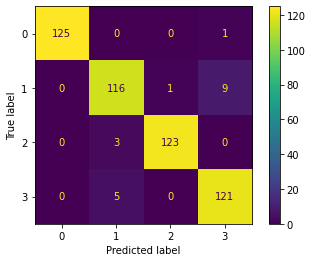

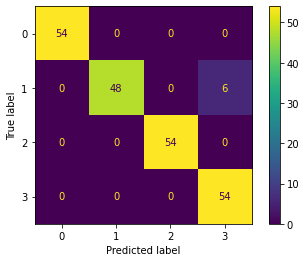

In [ ]:
param_grid = [
    {'C':[0.5,1,3,5,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'degree':[0,0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],
     'kernel':['poly']}
]
optimal_params = model_selection.GridSearchCV(
    SVC(random_state=393),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
poly=optimal_params.fit(X_train_norm,y_train)
print(optimal_params.best_params_)
plot_confusion_matrix(poly,X_train_norm,y_train,values_format='d',display_labels=['0','1','2','3'])

SVC(random_state=393)
y_pred=poly.predict(X_test_norm)
plot_confusion_matrix(poly,X_test_norm,y_test,values_format='d',display_labels=['0','1','2','3'])

metricas = pd.DataFrame(index = ['acuracia','precisao','sensitividade','f1_score'],columns=['0','1','2','3'])
metricas.iloc[0] = accuracy_score(y_test, y_pred)
metricas.iloc[1] = precision_score(y_test, y_pred, average=None)
metricas.iloc[2] = recall_score(y_test, y_pred, average=None)
metricas.iloc[3] = f1_score(y_test, y_pred, average=None)

print('Métricas da Matriz de Confusão de Teste do Kernel Polinomial (54 elementos de cada classe):')
print(metricas)

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
Métricas da Matriz de Confusão de Teste do Kernel Sigmoidal(54 elementos de cada classe):
                      0         1         2         3
acuracia       0.972222  0.972222  0.972222  0.972222
precisao            1.0       1.0       1.0       0.9
sensitividade       1.0  0.888889       1.0       1.0
f1_score            1.0  0.941176       1.0  0.947368


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


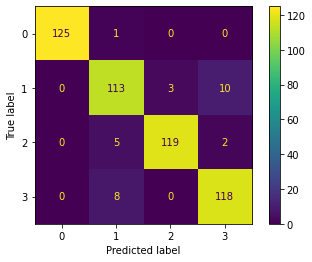

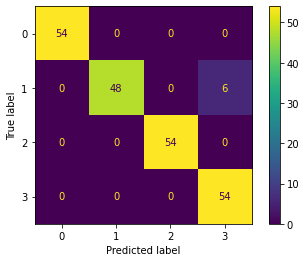

In [ ]:
param_grid = [
    {'C':[0.5,1,3,5,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['sigmoid']}
]
optimal_params = model_selection.GridSearchCV(
    SVC(random_state=393),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
sigmoid=optimal_params.fit(X_train_norm,y_train)
print(optimal_params.best_params_)
mat_train = plot_confusion_matrix(sigmoid,X_train_norm,y_train,values_format='d',display_labels=['0','1','2','3'])

SVC(random_state=393)
y_pred=sigmoid.predict(X_test_norm)
mat_test = plot_confusion_matrix(sigmoid,X_test_norm,y_test,values_format='d',display_labels=['0','1','2','3'])

metricas = pd.DataFrame(index = ['acuracia','precisao','sensitividade','f1_score'],columns=['0','1','2','3'])
metricas.iloc[0] = accuracy_score(y_test, y_pred)
metricas.iloc[1] = precision_score(y_test, y_pred, average=None)
metricas.iloc[2] = recall_score(y_test, y_pred, average=None)
metricas.iloc[3] = f1_score(y_test, y_pred, average=None)

print('Métricas da Matriz de Confusão de Teste do Kernel Sigmoidal(54 elementos de cada classe):')
print(metricas)


{'C': 5, 'kernel': 'linear'}
Métricas da Matriz de Confusão de Teste do Kernel Linear(54 elementos de cada classe):
                      0         1         2         3
acuracia       0.972222  0.972222  0.972222  0.972222
precisao            1.0       1.0       1.0       0.9
sensitividade       1.0  0.888889       1.0       1.0
f1_score            1.0  0.941176       1.0  0.947368


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


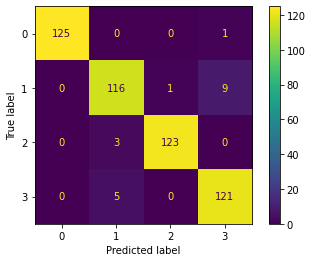

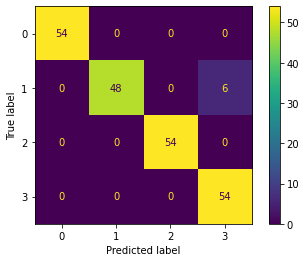

In [ ]:
param_grid = [
    {'C':[0.5,1,3,5,10,100],
     'kernel':['linear']}
]

optimal_params = model_selection.GridSearchCV(
    SVC(random_state=393),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)

linear=optimal_params.fit(X_train_norm,y_train)
print(optimal_params.best_params_)
plot_confusion_matrix(linear,X_train_norm,y_train,values_format='d',display_labels=['0','1','2','3'])

SVC(random_state=393)
y_pred=linear.predict(X_test_norm)
plot_confusion_matrix(linear,X_test_norm,y_test,values_format='d',display_labels=['0','1','2','3'])

metricas = pd.DataFrame(index = ['acuracia','precisao','sensitividade','f1_score'],columns=['0','1','2','3'])
metricas.iloc[0] = accuracy_score(y_test, y_pred)
metricas.iloc[1] = precision_score(y_test, y_pred, average=None)
metricas.iloc[2] = recall_score(y_test, y_pred, average=None)
metricas.iloc[3] = f1_score(y_test, y_pred, average=None)

print('Métricas da Matriz de Confusão de Teste do Kernel Linear(54 elementos de cada classe):')
print(metricas)

Conclui-se que o melhor modelo para este data-set foi o Gaussiano (*{'C': 10, 'gamma': 1, 'kernel': 'rbf'}*). O conjunto utilizado se apresentou em versão *lite* devido o estudo ter sido um projeto de disciplina. Porém, recomenda-se a reprodução da metodologia para o conjunto íntegro, uma vez que o método *Support Vector Machine* não lida tão bem com amostras pequenas.